## Customer Retention Project

E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.
Be careful: There are two sheets (one is detailed) and second is encoded in the excel file. You may use any of them by extracting in separate excel sheet. The number of column(s) is more than 47. Read the column header carefully.
Note : Data Scientists have to apply their analytical skills to give findings and conclusions in detailed data analysis written in jupyter notebook . Only data analysis is required.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data for dataframe
df=pd.read_excel('customer_retention_dataset.xlsx','datasheet')

In [4]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [5]:
#we have 269 rows and 71 columns. Let's look at each columns name
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

We have only 1 numerical feature and rest others are categorical features

Only pinocde is numerical.

<AxesSubplot:>

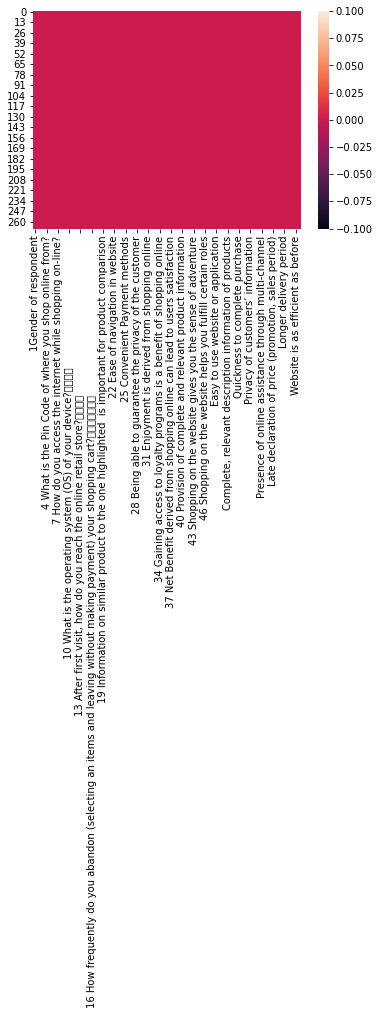

In [6]:
#checking for any null values
sns.heatmap(df.isnull())

Data Analysis

Lets 1st observe what age categroies we are looking for

In [7]:
#let me first rename that columns
df.rename(columns={'2 How old are you? ':'Age'}, inplace=True)

In [8]:
df.Age.unique()

array(['31-40 years', '21-30 years', '41-50 yaers', 'Less than 20 years',
       '51 years and above'], dtype=object)

We have 5 categories
1. Less than 20 years
2. 21-30 years
3. 31-40 years
4. 41-50 years
5. 51 years and above

1. In India we can say that youngster are tech savvy and they prefer to shop online.
2. Age 41 and above are the one who will be tentative to use the technology.
3. Lets see if I can derive some insighths through the data.
4. My analysis will mostly revolve around the age group

In [36]:
#let me first rename that columns
df.rename(columns={'1Gender of respondent':'Gender'}, inplace=True)

<AxesSubplot:ylabel='Gender'>

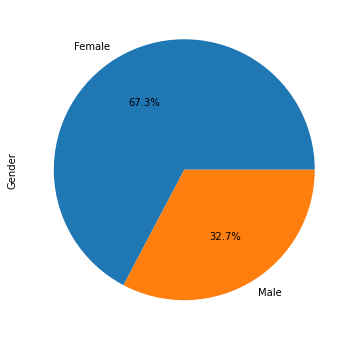

In [38]:
df['Gender'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

67.3% of the users are female

<AxesSubplot:ylabel='Age'>

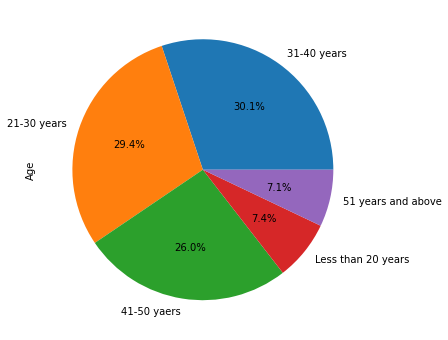

In [41]:
#lets see the distribuiton of age group in the data
df['Age'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Observation:
1. We have good distribution of age from 21-50 years.
2. Below 20 the data is less as they may not be able to shop online as they dont hold Credit card or Debit Card.
3. Above 51 are not too tech savvy. Hence the distribution is less.

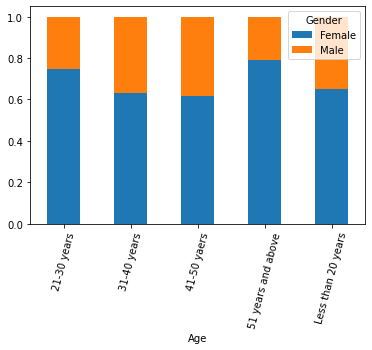

In [40]:
ct = pd.crosstab(df.Age, df.Gender,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

There are 60% of the female who shop online between age 31-50

In [8]:
#Let's see the dstribution of city but before that I will rename the column
df.rename(columns={'3 Which city do you shop online from?':'City'}, inplace=True)

In [42]:
df.City.value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64

<AxesSubplot:ylabel='City'>

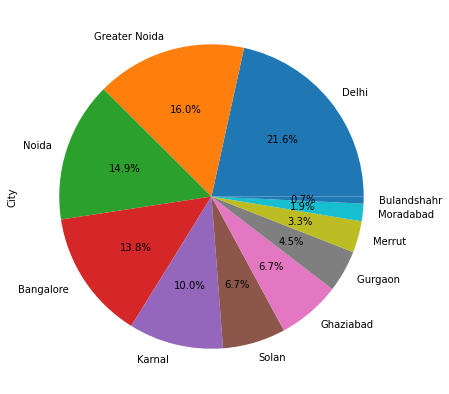

In [14]:
df['City'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

The data is mostly from the people of Delhi, Greater Noida, Noida and Bangalore

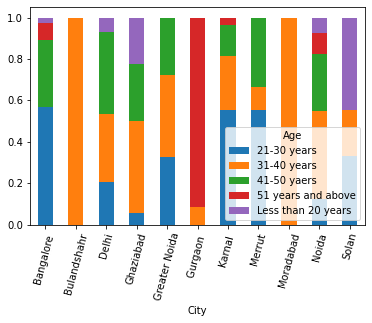

In [27]:
ct = pd.crosstab(df.City, df.Age,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Observation
1. 51 years and above are active user in Gurgaon followed by 31-40 years
2. In Moradabad and Bulandshahr, both is the least contributing city, 31-40 years are most active user
3. More than 50% of the Bangalore, Karnal and Merrut users are between 21-30 years

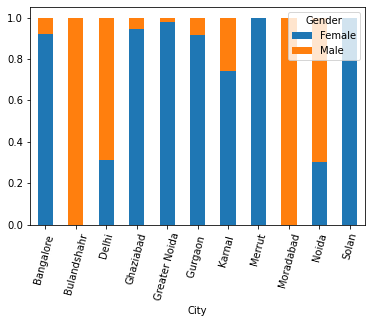

In [43]:
ct = pd.crosstab(df.City, df.Gender,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Observation:
1. There are only Male users in Bulandshahr and Moradabad
2. There are only female users in Solan and Merut
3. 90% of the users in Bangalore are female.
4. 70% of the users in Delhi are Male

In [9]:
#Let's see which city has purchased more in last 1 year but before that let me rename the column
df.rename(columns={'6 How many times you have made an online purchase in the past 1 year?':'Purchases'}, inplace=True)

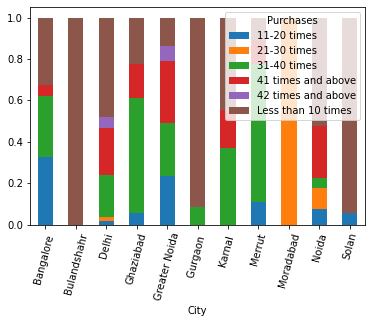

In [30]:
ct = pd.crosstab(df.City, df.Purchases,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Observation:
1. Bangalore has shown high number of purchases as majority of the user are between 21-30 times.
2. Meerut less than 15% users has less than 10 times purchases.
3. Moradabad who has active users between 31-40 years has shown good performance with purchases between 21-30 times.
4. However same cannot be said about Bulandshahr, which has shown least performance with the same age group as Moradabad..
5. Solan who has good distribution of age has also shown poor performance.

We need to understand the following
1. The diffferenece of purchases between Bulandshahr and Moradabad as both the city has the same age group for purchase
2. Solan contrbutes 6.7% of the users and is still it has less purchases.

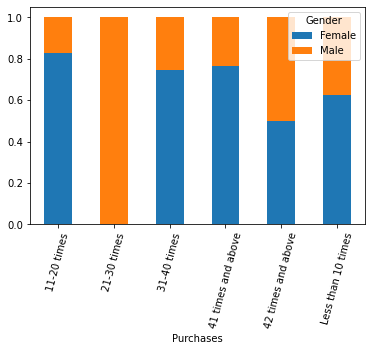

In [44]:
ct = pd.crosstab(df.Purchases, df.Gender,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

The above graph shows that female users shopped online more.

In [10]:
#lets see if processing speed is the reason for less purchase. Let me rename the column
df.rename(columns={'23 Loading and processing speed':'Speed'}, inplace=True)

In [33]:
df.Speed.unique()

array(['Strongly disagree (1)', 'Strongly agree (5)', 'Agree (4)',
       'Dis-agree (2)', 'Indifferent (3)'], dtype=object)

<AxesSubplot:ylabel='Speed'>

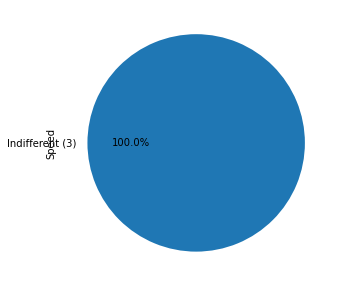

In [15]:
ct=df.loc[df["City"] == "Bulandshahr"]['Speed']
ct.value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

<AxesSubplot:ylabel='Speed'>

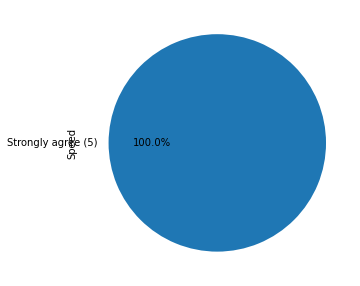

In [16]:
ct=df.loc[df["City"] == "Moradabad"]['Speed']
ct.value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

Conclusion:
From the above two plots we can conclude that Speed is good in Moradabad.
To retain the customer in Bulandshahr we need to understand the issue of Speed there.

In [11]:
#Let's see how long the customer are shopping online
df.rename(columns={'5 Since How Long You are Shopping Online ?':'ShopSince'}, inplace=True)

In [26]:
df.ShopSince.unique()

array(['Above 4 years', '3-4 years', '2-3 years', 'Less than 1 year',
       '1-2 years'], dtype=object)

<AxesSubplot:ylabel='ShopSince'>

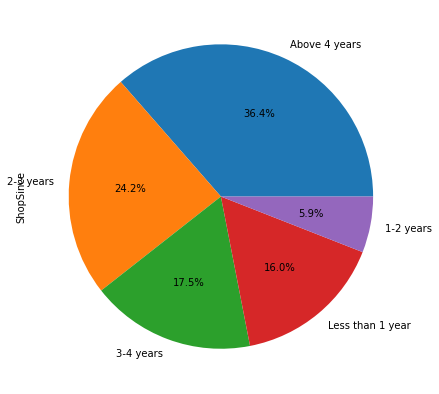

In [24]:
df['ShopSince'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Observation:
1. 36.40% of the users are shopping online for more than 4years and 17.5% between 3-4years.
2. 16.0% have started using recently

<AxesSubplot:ylabel='City'>

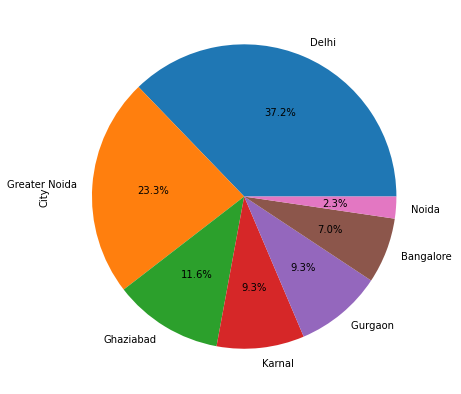

In [29]:
ct=df.loc[df["ShopSince"] == "Less than 1 year"]['City']
ct.value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

1. Majority of the new user are from Delhi followed by Greater Noida
2. There are no new user from the city of Moradabad, Bulandshahr and Meerut

In [12]:
#Let's see which app customer prefers a lot to shop
df.rename(columns={'Easy to use website or application':'App'}, inplace=True)

<AxesSubplot:ylabel='App'>

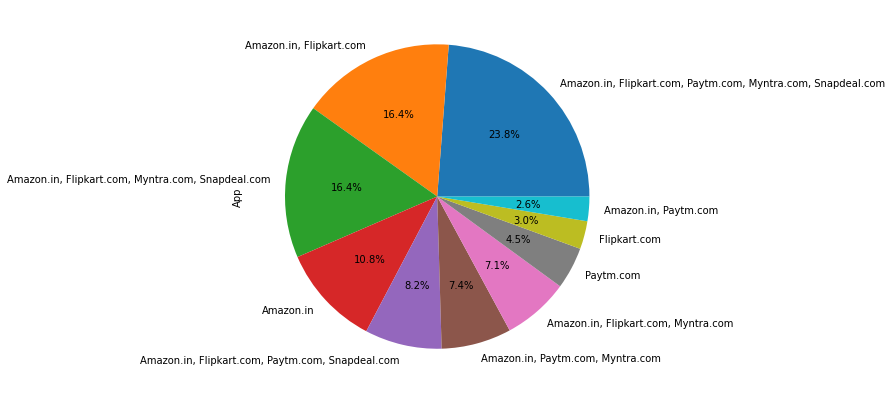

In [31]:
df['App'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Amazon, Flipkart, Myntra and Paytm are the most common apps used for shopping online

<AxesSubplot:ylabel='Wild variety of product on offer'>

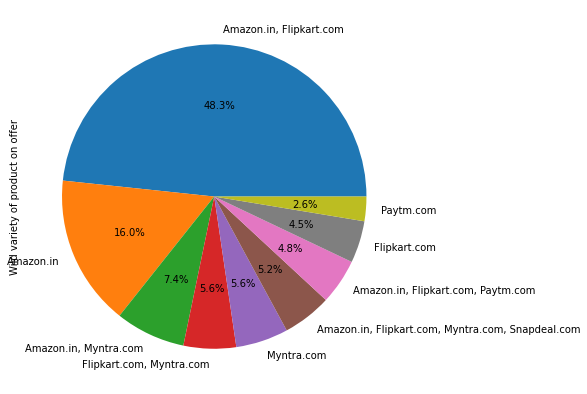

In [35]:
df['Wild variety of product on offer'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

1. Amazon and Flipkart offers wide variety of the product
2. Paytm and Snapdeal are falling behind in terms of the product variety

<AxesSubplot:ylabel='Reliability of the website or application'>

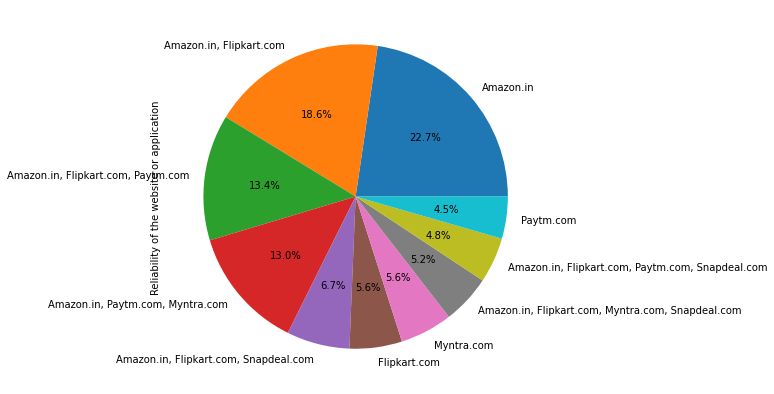

In [36]:
df['Reliability of the website or application'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Amazon, Flipkart and Paytm are the most reliable application

<AxesSubplot:ylabel='Security of customer financial information'>

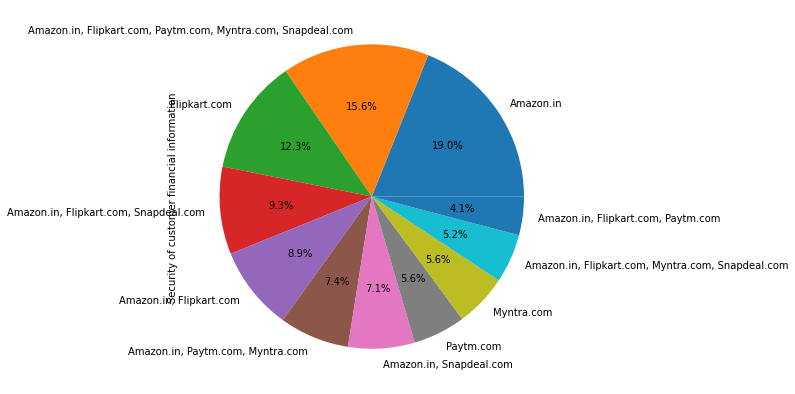

In [41]:
df['Security of customer financial information'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Users believe in Amazon, Flipkart and Myntra about the security of their financial transaction

<AxesSubplot:ylabel='Limited mode of payment on most products (promotion, sales period)'>

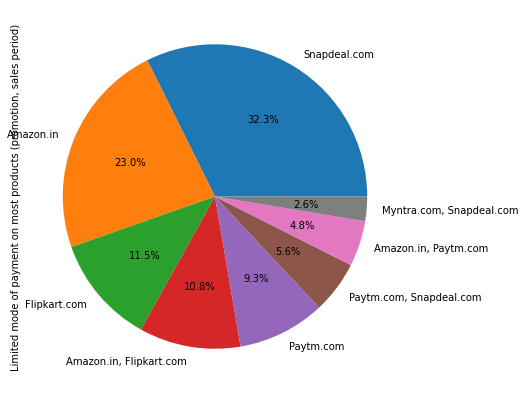

In [42]:
df['Limited mode of payment on most products (promotion, sales period)'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Most user feels that Snapdeal has limited payment option

In [13]:
#Let's see which app customer prefers a lot to shop
df.rename(columns={'16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'Abandon'}, inplace=True)

<AxesSubplot:ylabel='Abandon'>

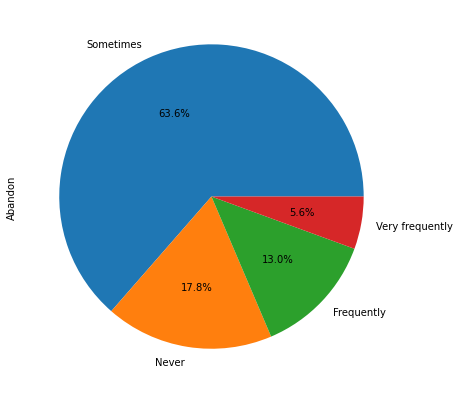

In [45]:
df['Abandon'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Observation:
1. 63.6% of the user sometimes abandon the shopping cart.
2. 5.6% do it very frequently
3. 17.8% never abandon their shopping cart

<AxesSubplot:ylabel='Abandon'>

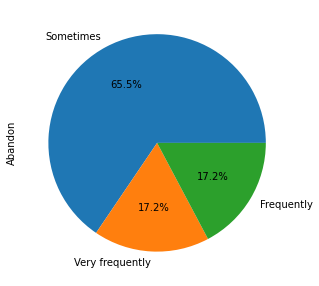

In [48]:
ct=df.loc[df["Limited mode of payment on most products (promotion, sales period)"] == "Snapdeal.com"]['Abandon']
ct.value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

1. As we have observed earlier Snapdeal has limited option of payment hence we can see 34.4% of the user frequently abandon their purchase on Snapdeal.com and 65.5% sometimes.

2. There are no user who 'never' abandon when purchasing on snapdeal

<AxesSubplot:ylabel='25 Convenient Payment methods'>

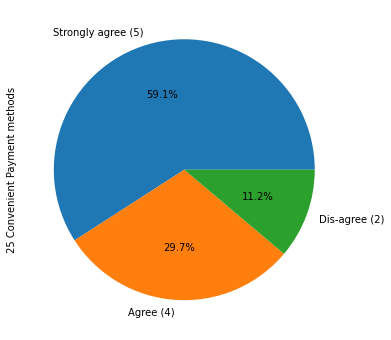

In [54]:
df['25 Convenient Payment methods'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

1. 59.1% strongly agree that convenient payment method are avialable
2. 11.2% disagree

<AxesSubplot:ylabel='City'>

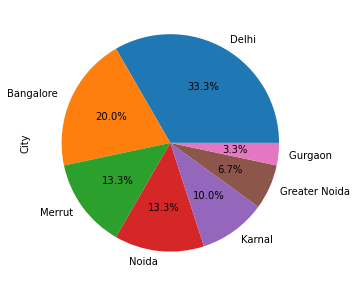

In [58]:
ct=df.loc[df["25 Convenient Payment methods"] == "Dis-agree (2)"]['City']
ct.value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

1. 33.3% of the user in Delhi disagree with the convenient payment option followed by Bangalore


<AxesSubplot:ylabel='Age'>

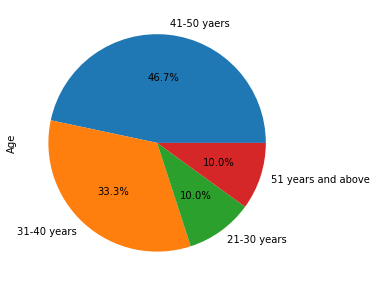

In [59]:
ct=df.loc[df["25 Convenient Payment methods"] == "Dis-agree (2)"]['Age']
ct.value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

Users between age 41-50 years compromise 46.7% of the users who disagree with the convenient payment option.

Does this Users do not have CC or they are looking for a better option like COD?

In [14]:
#Let's see if loyalty programs makes any difference
df.rename(columns={'34 Gaining access to loyalty programs is a benefit of shopping online':'Loyalty'}, inplace=True)

<AxesSubplot:ylabel='Loyalty'>

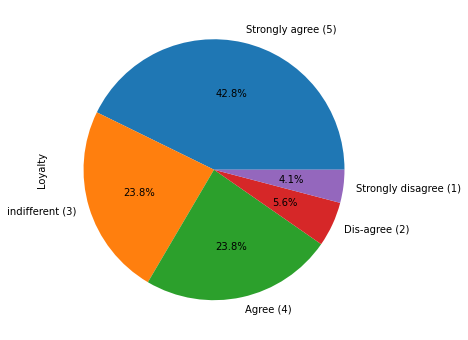

In [61]:
df['Loyalty'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

1. 42.8% strongly agree and 23.8% agree that loyalty program is the benefit of shopping online

In [15]:
#Let's see if responsiveness makes any difference
df.rename(columns={'29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Responsiveness'}, inplace=True)

<AxesSubplot:ylabel='Responsiveness'>

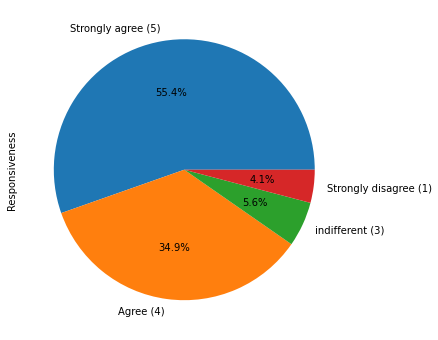

In [67]:
df['Responsiveness'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

55.4% strongly agree that there should be several communication channel for responsiveness

In [16]:
#Let's observe customer preferred payment option
df.rename(columns={'15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'PrefPayment'}, inplace=True)

<AxesSubplot:ylabel='PrefPayment'>

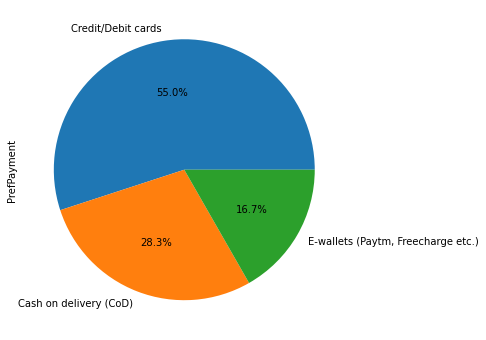

In [69]:
df['PrefPayment'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

55% of the users preferred payment option as Credit card followed by CoD which is 28.3%

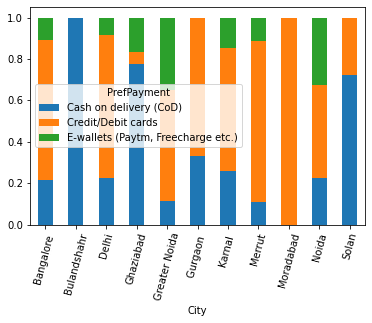

In [70]:
ct = pd.crosstab(df.City, df.PrefPayment,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

1. Users in Bulandshahr prefers only COD as preferred payment.
2. More than 70% of users in Ghaziabad and Solan too prefer COD payment option.
3. Users in Moradabad prefers payment through Credit/Debit cards.
4. E-wallets payment are demand in Greater Noida and Noida

<AxesSubplot:ylabel='Abandon'>

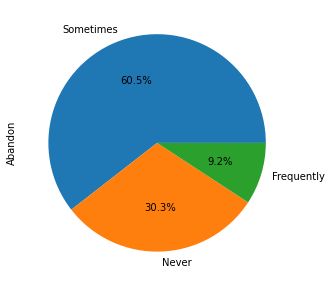

In [17]:
ct=df.loc[df["PrefPayment"] == "Cash on delivery (CoD)"]['Abandon']
ct.value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

30.3% of the users will never abandon if they get CoD option as a preferred payment

In [18]:
#lets understand the reason for abandoning the shopping cart
df.rename(columns={'17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'AbandonReason'}, inplace=True)

<AxesSubplot:ylabel='AbandonReason'>

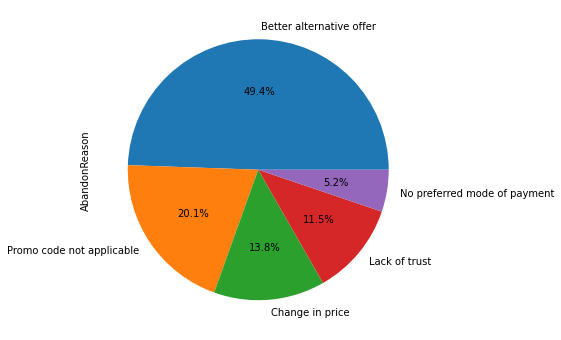

In [19]:
df['AbandonReason'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

1. 49.4% abandon their shopping cart/bag as they get better alternative option
2. 20.1% abandon as their promo code is not applicable.

<AxesSubplot:ylabel='Age'>

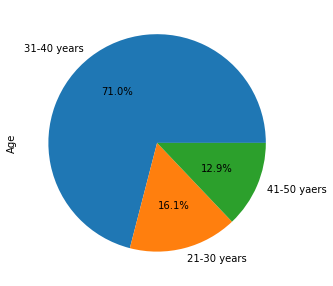

In [20]:
ct=df.loc[df["AbandonReason"] == "Lack of trust"]['Age']
ct.value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

71% users from age group 31-40 abandon their shopping bag due to lack of trust

<AxesSubplot:ylabel='City'>

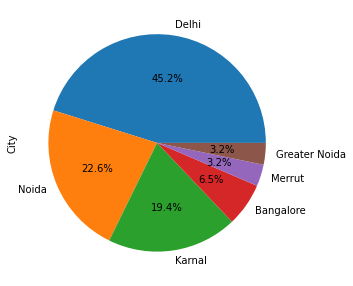

In [21]:
ct=df.loc[df["AbandonReason"] == "Lack of trust"]['City']
ct.value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

45.2% users from Delhi and 22.6% from Noida do not trust the application or website.

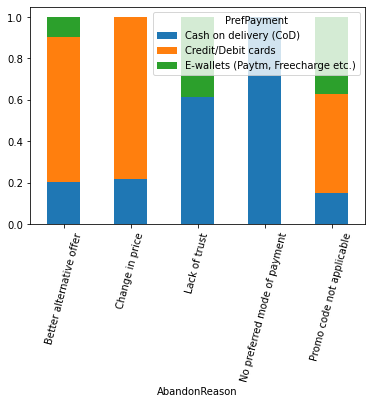

In [22]:
ct = pd.crosstab(df.AbandonReason, df.PrefPayment,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Observation:
1. Credit card users keep looking for better alternate option and abandon their purchase if the price changes.
2. CC users trust the application they use.
3. They also frequently look for promo offers, additional cashback from their bank, etc. Hence they abandon their shopping bag.

<AxesSubplot:ylabel='30 Online shopping gives monetary benefit and discounts'>

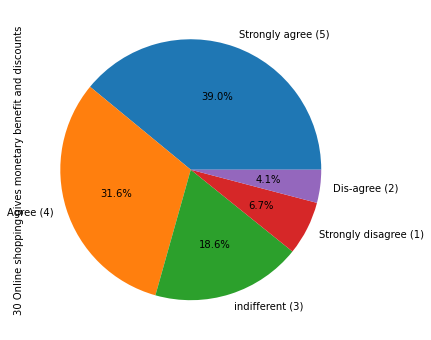

In [23]:
df['30 Online shopping gives monetary benefit and discounts'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

There is a strong agreement among the user that online shopping gives them monetary benefits.

<AxesSubplot:ylabel='31 Enjoyment is derived from shopping online'>

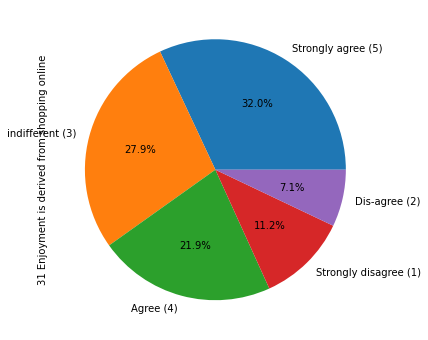

In [24]:
df['31 Enjoyment is derived from shopping online'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

32.0% Strongly agree that they derive enjoyment from shopping online.

<AxesSubplot:ylabel='Age'>

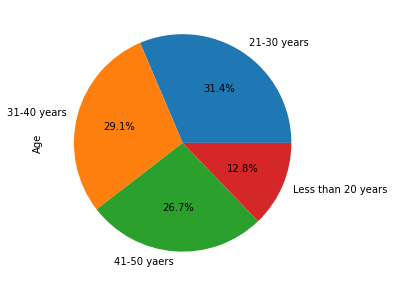

In [26]:
ct=df.loc[df["31 Enjoyment is derived from shopping online"] == "Strongly agree (5)"]['Age']
ct.value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

Almost all age group derive pleasure by shopping online.

<AxesSubplot:ylabel='32 Shopping online is convenient and flexible'>

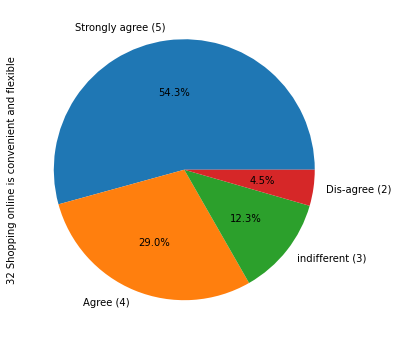

In [27]:
df['32 Shopping online is convenient and flexible'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

83.3% of the uers are in agreement that shopping is conveniet and flexible

In [28]:
#lets see the return/replace policy has any impact
df.rename(columns={'33 Return and replacement policy of the e-tailer is important for purchase decision':'RetRep'}, inplace=True)

<AxesSubplot:ylabel='RetRep'>

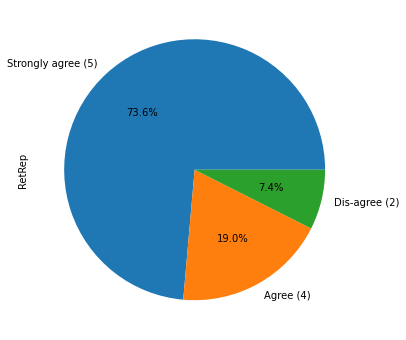

In [29]:
df['RetRep'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

We are not surprise here, 92.6% users agree that return and replace policy is the must for going ahead with the purchase.

<AxesSubplot:ylabel='43 Shopping on the website gives you the sense of adventure'>

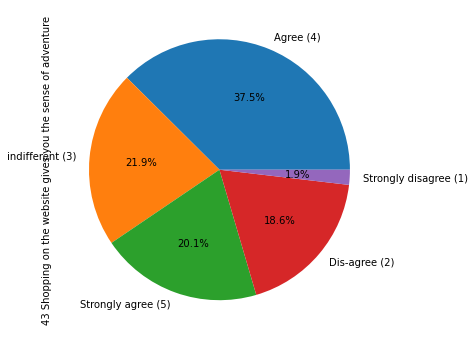

In [30]:
df['43 Shopping on the website gives you the sense of adventure'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

57.6% of the users agree that shopping on the website gives the sense of adventure

<AxesSubplot:ylabel='44 Shopping on your preferred e-tailer enhances your social status'>

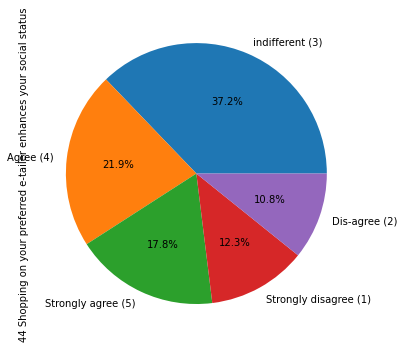

In [31]:
df['44 Shopping on your preferred e-tailer enhances your social status'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

37.20% of the user are indifferent that the shopping enhances individual social status

<AxesSubplot:ylabel='45 You feel gratification shopping on your favorite e-tailer'>

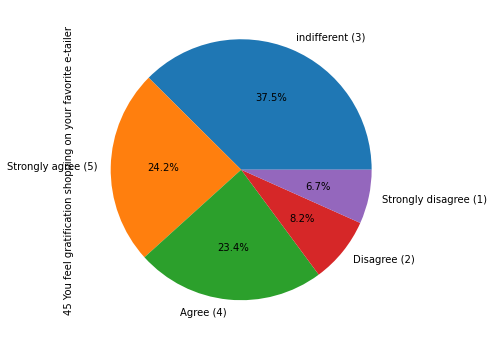

In [32]:
df['45 You feel gratification shopping on your favorite e-tailer'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

37.5% user are neutral and doesn't feel any gratification for particular retailer

<AxesSubplot:ylabel='46 Shopping on the website helps you fulfill certain roles'>

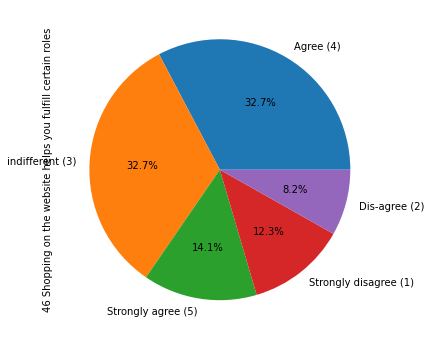

In [33]:
df['46 Shopping on the website helps you fulfill certain roles'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

1. 46.8% of the users shop as it helps them fulfill certain roles.
2. Its a good number and we will need more insight what roles are the users referrring to

<AxesSubplot:ylabel='47 Getting value for money spent'>

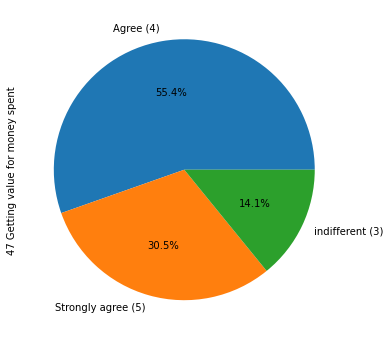

In [46]:
df['47 Getting value for money spent'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Its a strong data and it says that none of the users disagree that they are getting value for their money spent

This could be because of online offers and promotion that run frequently

<AxesSubplot:ylabel='Visual appealing web-page layout'>

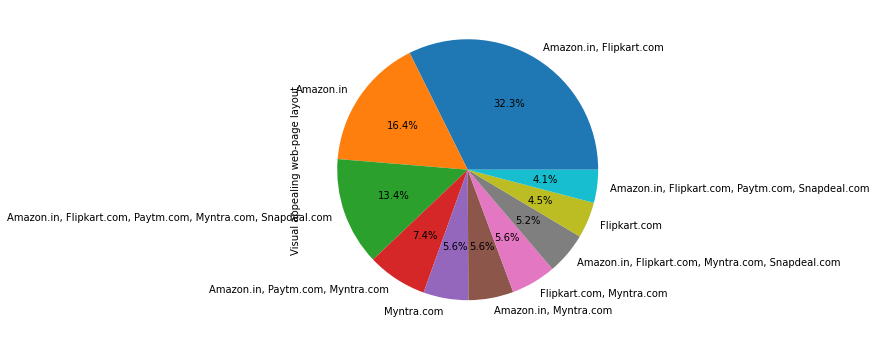

In [47]:
df['Visual appealing web-page layout'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Amazon.in is the most visual appealing web page payout

<AxesSubplot:ylabel='Complete, relevant description information of products'>

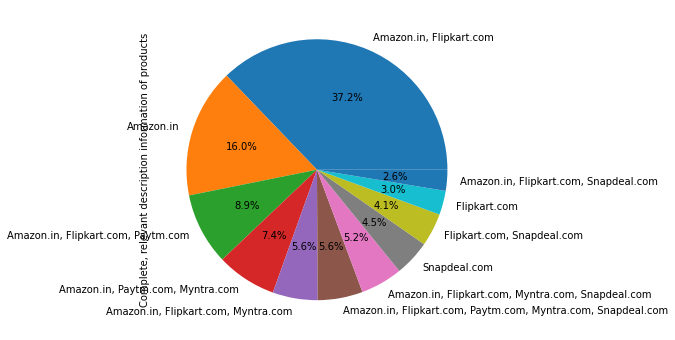

In [48]:
df['Complete, relevant description information of products'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Amazon.in and Flipkart has complete relevant information of products

<AxesSubplot:ylabel='Fast loading website speed of website and application'>

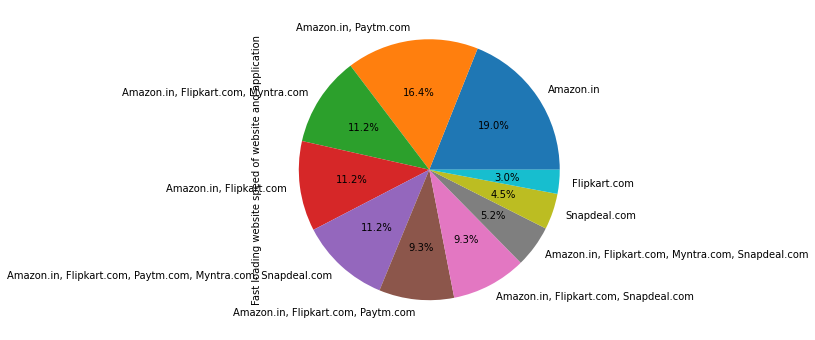

In [49]:
df['Fast loading website speed of website and application'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Amazon and Flipkart has fast loading website and application

<AxesSubplot:ylabel='Quickness to complete purchase'>

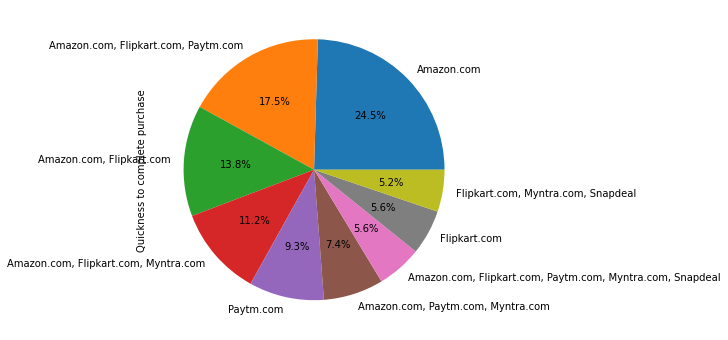

In [50]:
df['Quickness to complete purchase'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Snapdeal lacks quickness to complete the purchase

<AxesSubplot:ylabel='Speedy order delivery '>

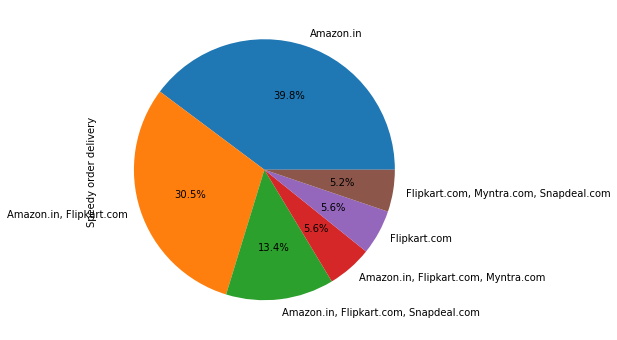

In [51]:
df['Speedy order delivery '].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

<AxesSubplot:ylabel='Perceived Trustworthiness'>

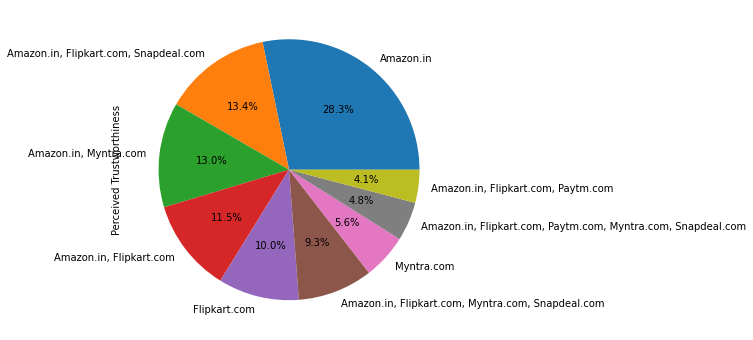

In [52]:
df['Perceived Trustworthiness'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Amazon.in is perceived as trustworthiness as per the all the users

<AxesSubplot:ylabel='Longer time in displaying graphics and photos (promotion, sales period)'>

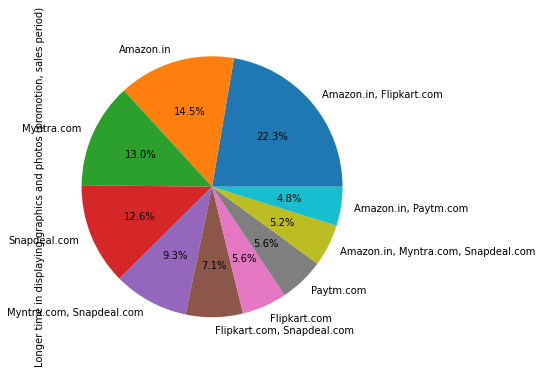

In [53]:
df['Longer time in displaying graphics and photos (promotion, sales period)'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

<AxesSubplot:ylabel='Frequent disruption when moving from one page to another'>

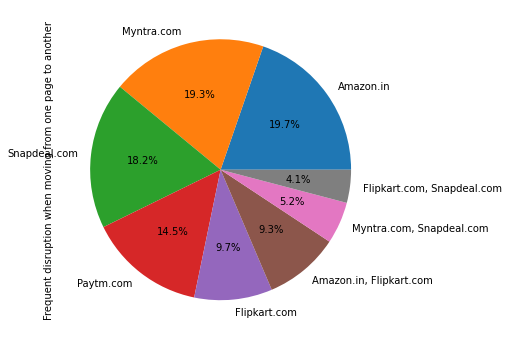

In [54]:
df['Frequent disruption when moving from one page to another'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Myntra, Snapdeal and Paytm has frequent disruption when moving from one page to another

<AxesSubplot:ylabel='Website is as efficient as before'>

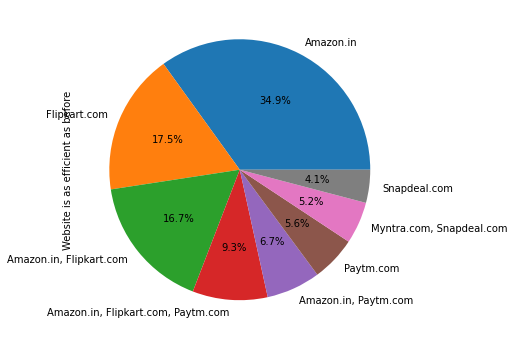

In [55]:
df['Website is as efficient as before'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Snapdeal has poor rating about the efficieny of the website.

Lets see how users access the website and application

In [58]:
df.rename(columns={'7 How do you access the internet while shopping on-line?':'Access'}, inplace=True)

<AxesSubplot:ylabel='Access'>

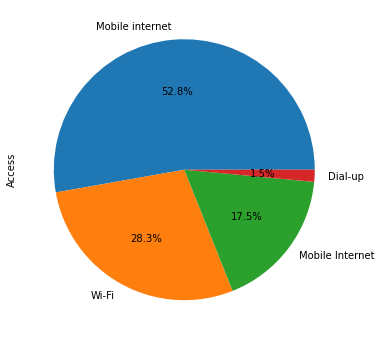

In [60]:
df['Access'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

Mobile internet is used by 70.3% of the users and 28.3% used Wifi

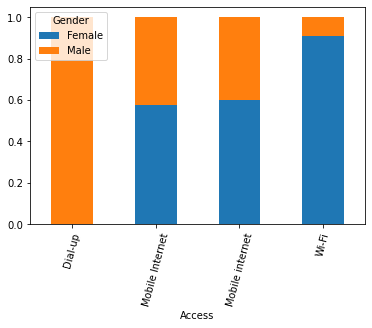

In [62]:
ct = pd.crosstab(df.Access, df.Gender,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

1. Only Male users are using dial up
2. Male users rarely use Wi-fi for accessing the website

In [63]:
df.rename(columns={'8 Which device do you use to access the online shopping?':'Device'}, inplace=True)

<AxesSubplot:ylabel='Device'>

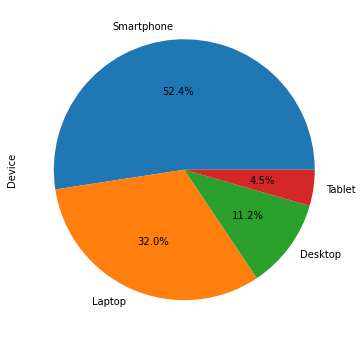

In [64]:
df['Device'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

1. 52.4% of the user uses Smartphone to access the online shopping
2. Only 4.5% uses Tablet

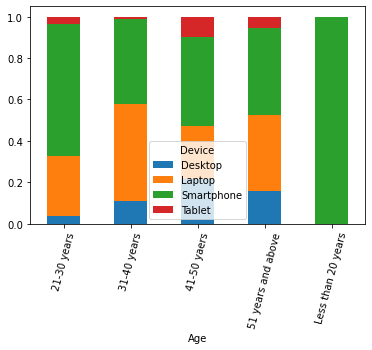

In [67]:
ct = pd.crosstab(df.Age, df.Device,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

1. Less than 20 years only use Smartphone for their shopping

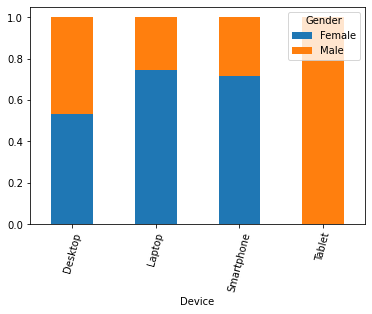

In [70]:
ct = pd.crosstab(df.Device, df.Gender,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

1. Only Male users uses Tablet for online shopping
2. Desktop usage is equally distributed among Male and Female users

In [71]:
df.rename(columns={'10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'OS'}, inplace=True)

<AxesSubplot:ylabel='OS'>

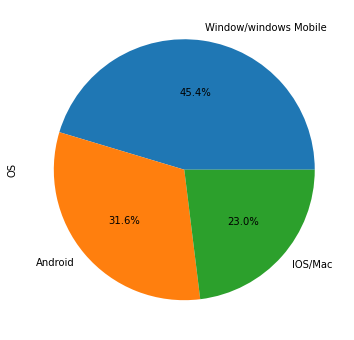

In [72]:
df['OS'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

45.4% of the users uses Windows/Windows Mobile

In [73]:
df.rename(columns={'11 What browser do you run on your device to access the website?\t\t\t                                                          ':'Browser'}, inplace=True)

<AxesSubplot:ylabel='Browser'>

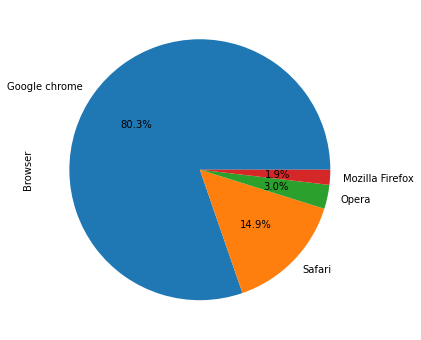

In [74]:
df['Browser'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

1. Google chrome is the most preferred browser followed by Safari.
2. Mozilla firefox is least preferred

<AxesSubplot:ylabel='Frequent disruption when moving from one page to another'>

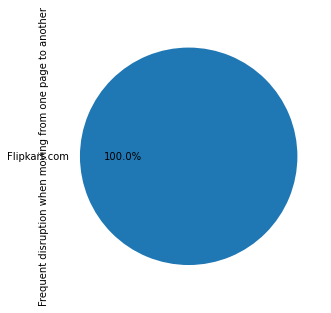

In [75]:
ct=df.loc[df["Browser"] == "Mozilla Firefox"]['Frequent disruption when moving from one page to another']
ct.value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

100% of the user faces issue on Mozilla Firefox while moving from one page to another on Flipkart

<AxesSubplot:ylabel='Which of the Indian online retailer would you recommend to a friend?'>

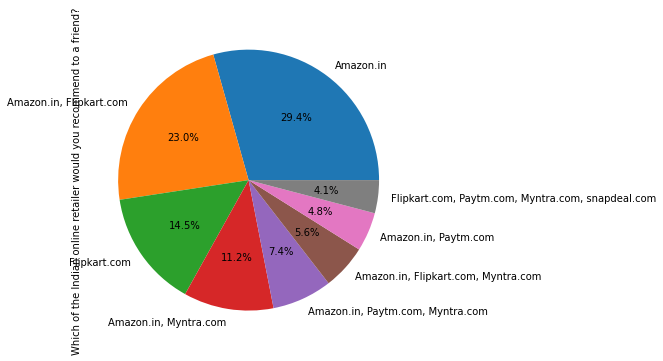

In [76]:
df['Which of the Indian online retailer would you recommend to a friend?'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')

1. Most user will recommend Amazon.in and Flipkart to their friends.
2. snapdeal.com is fare behind as only 4.1% of the user will recommend it to their friends

#### Conclusion

Customer satisfaction is important to win the customer back. There is lot of competition in e-commerce space of reatilers hence company should focus in offerring the best service.

##### Conveninece
The interface should be user friendly. There should be complete description of the product on the website or application and it should be efficient to use.

##### Security
Company should win customer trust that their personal and financial details are secure with us and will not be used for any fradulent activity.

##### Loyalty
One of the best way to retain the customer is to have a rewarding loyalty program. Customer should feel invested in the company and they will be happy that every purchase they are making will lead to more rewarding experience.

##### Technical
Any issue while browsing should be addressed. Customer may lose out on the deal if there is some glitches or technical issue with the website. The browsing should be quick especially during the sale or promotion period.